In [ ]:
cd drive/My\ Drive/cancer dataset

/content/drive/My Drive/cancer dataset


In [ ]:
##! curl -O https://isic-challenge-stade.s3.amazonaws.com/ISBI2016_ISIC_Part1_Training_Data.zip


In [ ]:
##! curl -O https://isic-challenge-stade.s3.amazonaws.com/ISBI2016_ISIC_Part1_Training_GroundTruth.zip

In [ ]:
##! unzip ISBI2016_ISIC_Part1_Training_Data.zip

In [ ]:
##! unzip ISBI2016_ISIC_Part1_Training_GroundTruth.zip

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import skimage as skm
from skimage import measure
import os
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
training_data_path='ISBI2016_ISIC_Part1_Training_Data'
masked_training_path='ISBI2016_ISIC_Part1_Training_GroundTruth'

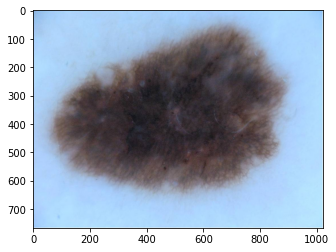

In [ ]:
img1=cv2.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000000.jpg')
img1=cv2.cvtColor(img1.copy(),cv2.COLOR_BGR2RGB)
plt.imshow(img1)

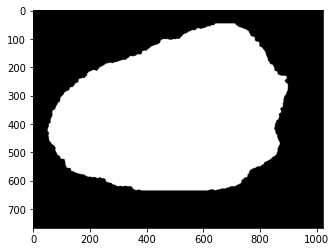

In [ ]:
img1_mask=cv2.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000000_Segmentation.png')
img1_mask=cv2.cvtColor(img1_mask,cv2.COLOR_BGR2GRAY)
plt.imshow(img1_mask,cmap='gray')

[array([[[644,  47]],

       [[643,  48]],

       [[642,  48]],

       ...,

       [[647,  47]],

       [[646,  47]],

       [[645,  47]]], dtype=int32)]


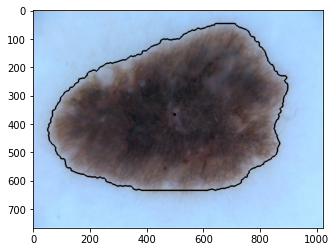

In [ ]:
ret, thresh = cv2.threshold(img1_mask.copy(), 0, 255, cv2.THRESH_BINARY)

# Find contours:
im, contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours:
cv2.drawContours(img1, im, 0, (0, 0, 0), 3)

# Calculate image moments of the detected contour
M = cv2.moments(im[0])

# Print center (debugging):
#print("center X : '{}'".format(round(M['m10'] / M['m00'])))
#print("center Y : '{}'".format(round(M['m01'] / M['m00'])))
print(im)
# Draw a circle based centered at centroid coordinates
cv2.circle(img1, (round(M['m10'] / M['m00']), round(M['m01'] / M['m00'])), 5, (0, 0, 0), -1)

# Show image:
#cv2.imshow("outline contour & centroid", image)
plt.imshow(img1)

In [ ]:
import os
image_id=[]
ls=[]
i=0
for dirname, _, filenames in os.walk('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth'):
    for filename in filenames:
      image_id.append(filename[6:12])
      ls.append(os.path.join(dirname,filename))
      #print(filename[6:12])



In [ ]:
'/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000000_Segmentation.png'[85:92]

'0000000'

In [ ]:
class Imagepreprocess:
  
  def __init__(self,path_image,path_image_mask):
    
    self.image=cv2.imread(path_image)
    self.image_mask=cv2.imread(path_image_mask)
    self.originalsize_image=self.image.shape
    self.originalsize_image_mask=self.image_mask


  def image_resize(self):

    return (cv2.resize(self.image,(500,375),cv2.INTER_AREA))

  def annoate_coordinate(self):

    ret, thresh = cv2.threshold(image_mask.copy(), 0, 255, cv2.THRESH_BINARY)
    # Find contours:
    im, contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Draw contours:
    #cv2.drawContours(img1, im, 0, (0, 0, 0), 3)
    # Calculate image moments of the detected contour
    #M = cv2.moments(im[0])
    return im



In [ ]:
 
def annoate_coordinate():
  i=0
  while True:
    if i==(len(ls)):
      break
    print(i)
    #print(ls[i])
    path=ls[i]
    image_mask=cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2GRAY)
    #image_mask=cv2.resize(image_mask.copy(),(500,375),cv2.INTER_AREA)
    ret, thresh = cv2.threshold(image_mask.copy(), 0, 255, cv2.THRESH_BINARY)
    # Find contours:
    im, contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    i+=1
    yield im

annot=[]
for num in annoate_coordinate():
  annot.append(num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import json
dic={}
for i,e in enumerate(annot):
  dic['filename']=ls[i]
  regions={}
  t={}
  z={}
  l={}
  x1=[]
  y1=[]
  print(i)
  for k,cnt in enumerate(e): 
    region_attributes={}
    n = cnt.ravel()  
    p = 0
    x=[]
    y=[]
    for j in n : 
      if(p % 2 == 0): 
        x.append(int(n[p])) 
        y.append(int(n[p + 1]))   
      p = p + 1
    x1.append(x)
    y1.append(y)
    z['all_points_x']=x
    z['all_points_y']=y
    z['name']='polygon'
    t[str(k)]={'region_attributes':{},'shape_attributes':z}
    l.update(t)
  dic['regions']=l
  json.dump( dic, open( "/content/drive/My Drive/cancer dataset/annotated_new/"+ls[i][85:92]+".json", 'w' ) )
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
cd Mask_RCNN/

/content/drive/My Drive/cancer dataset/Mask_RCNN


In [ ]:

!python setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/config.py to config.cp

In [ ]:
from tqdm import tqdm
import json
from mrcnn import model as modellib, utils
import skimage

Using TensorFlow backend.


In [ ]:
class SkinCancer(utils.Dataset):
  def load_dataset(self,imagedir,train):
    annot_path='/content/drive/My Drive/cancer dataset/annotated_new/'
    self.add_class('skin-cancer',1,'skin-cancer')
    images_dir=imagedir
    for i,filename in enumerate(images_dir):
      Id=filename[85:92]
      file_name='/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_'+Id+'.jpg'
      if int(Id)>100 and train==True:
        annotations=json.load(open(os.path.join(annot_path,Id+'.json')))
        #annotations=annotations.values()
        print(i)
        #annotations=[a for a in annotations if type(a['regions']) is dict]
        #for a in annotations:
        #print(a)
        #if type(annotations[a]) is dict:
        polygons=[r['shape_attributes'] for r in annotations['regions'].values()]
        #else:
        #print(a)
        #polygons=[r['shape_attributes'] for r in a['regions']]
        image_path=file_name
        image = skimage.io.imread(image_path)
        height, width = image.shape[:2]
        self.add_image('skin-cancer',image_id=Id,path=image_path,width=width,height=height,polygons=polygons)
      if (int(Id)<=100) and (train==False):
        annotations=json.load(open(os.path.join(annot_path,Id+'.json')))
        print(i)
        polygons=[r['shape_attributes'] for r in annotations['regions'].values()]
        image_path=file_name
        image = skimage.io.imread(image_path)
        height, width = image.shape[:2]
        self.add_image('skin-cancer',image_id=Id,path=image_path,width=width,height=height,polygons=polygons)
  def load_mask(self,image_id):
    image_info=self.image_info[image_id]
    if image_info['source']!='skin-cancer':
      return super(self.__class__,self).load_mask(image_id)
    info=self.image_info[image_id]
    mask=np.zeros([info['height'],info['width'],len(info['polygons'])],dtype=np.uint8)
    for i,p in enumerate(info['polygons']):
      rr,cc=skimage.draw.polygon(p['all_points_y'],p['all_points_x'])
      mask[rr,cc,i]=1
    return mask.astype(np.bool),np.ones([mask.shape[-1]],dtype=np.int32)

  def image_reference(self,image_id):
     info=self.image_info[image_id]
     if info['source']=='skin-cancer':
       return info['path']
     else: 
       super(self.__class__,self).image_reference(image_id)


In [ ]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = BalloonDataset()
    dataset_train.load_balloon(args.dataset, "train")
    dataset_train.prepare()

    # Validation dataset
    #dataset_val = BalloonDataset()
    #dataset_val.load_balloon(args.dataset, "val")
    #dataset_val.prepare()
    print("Training network heads")
    model.train(dataset_train,learning_rate=config.LEARNING_RATE,epochs=30,layers='heads')

def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # Copy color pixels from the original color image where mask is set
    if mask.shape[-1] > 0:
        # We're treating all instances as one, so collapse the mask into one layer
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        splash = np.where(mask, image, gray).astype(np.uint8)
    else:
        splash = gray.astype(np.uint8)
    return splash


def detect_and_color_splash(model, image_path=None, video_path=None):
    #assert image_path or video_path

    # Image or video?
    #if image_path:
    # Run model detection and generate the color splash effect
    print("Running on {}".format(image_path))
    # Read image
    image = skimage.io.imread(image_path)
    # Detect objects
    r = model.detect([image], verbose=1)[0]
    # Color splash
    splash = color_splash(image, r['masks'])
    # Save output
    file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
    skimage.io.imsave(file_name, splash)
 

In [ ]:
dataset_train = SkinCancer()
dataset_train.load_dataset(ls,train=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
dataset_train.class_info

[{'id': 0, 'name': 'BG', 'source': ''},
 {'id': 1, 'name': 'skin-cancer', 'source': 'skin-cancer'}]

In [ ]:
dataset_train.prepare()

In [ ]:
dataset_train.image_info[0]

{'height': 2848,
 'id': '0006612',
 'path': '/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0006612.jpg',
 'polygons': [{'all_points_x': [2183,
    2182,
    2181,
    2180,
    2179,
    2178,
    2177,
    2176,
    2175,
    2174,
    2173,
    2172,
    2171,
    2170,
    2169,
    2168,
    2167,
    2166,
    2165,
    2164,
    2163,
    2162,
    2161,
    2160,
    2159,
    2158,
    2157,
    2156,
    2155,
    2154,
    2153,
    2152,
    2151,
    2150,
    2149,
    2148,
    2147,
    2146,
    2145,
    2144,
    2143,
    2142,
    2141,
    2140,
    2139,
    2138,
    2137,
    2136,
    2135,
    2134,
    2133,
    2132,
    2131,
    2130,
    2129,
    2128,
    2127,
    2126,
    2125,
    2124,
    2123,
    2122,
    2121,
    2120,
    2119,
    2118,
    2117,
    2116,
    2115,
    2114,
    2113,
    2112,
    2111,
    2110,
    2109,
    2108,
    2107,
    2106,
    2105,
    2104,
    2103,
    2102,
    2101,
    2

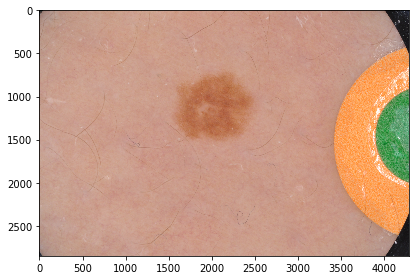

In [ ]:
skimage.io.imshow(dataset_train.load_image(0))

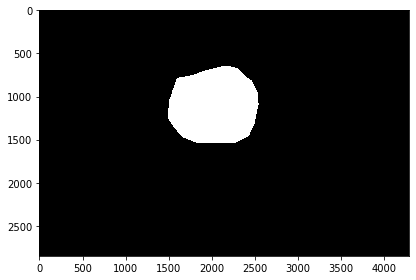

In [ ]:
skimage.io.imshow(dataset_train.load_mask(0)[0].reshape(2848,4288))

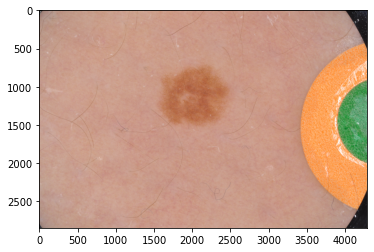

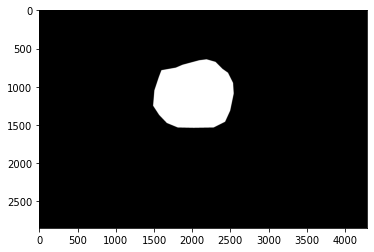

In [ ]:
plt.imshow(skimage.io.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0006612_Segmentation.png'),cmap='gray')

In [ ]:
cv2.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0006612_Segmentation.png').shape

(2848, 4288, 3)

In [ ]:
dataset_valid=SkinCancer()
dataset_valid.load_dataset(ls,train=False)

460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527


In [ ]:
dataset_valid.image_info[0]

{'height': 767,
 'id': '0000000',
 'path': '/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000000.jpg',
 'polygons': [{'all_points_x': [644,
    643,
    642,
    641,
    640,
    640,
    640,
    639,
    638,
    637,
    636,
    635,
    634,
    633,
    632,
    631,
    630,
    629,
    628,
    627,
    626,
    625,
    624,
    623,
    622,
    621,
    620,
    619,
    618,
    617,
    616,
    615,
    614,
    613,
    612,
    611,
    610,
    609,
    608,
    607,
    606,
    605,
    604,
    603,
    602,
    601,
    600,
    599,
    598,
    597,
    596,
    595,
    594,
    593,
    592,
    591,
    590,
    589,
    588,
    587,
    586,
    585,
    584,
    583,
    582,
    581,
    580,
    579,
    578,
    577,
    576,
    576,
    575,
    574,
    573,
    572,
    571,
    570,
    569,
    568,
    567,
    566,
    565,
    564,
    563,
    562,
    561,
    560,
    559,
    558,
    557,
    556,
    555,

In [ ]:
dataset_valid.prepare()

In [ ]:
dataset_valid.num_images

68

In [ ]:
dataset_train.num_images

832

In [ ]:
import skimage

In [ ]:
%ls

assets/                     LICENSE              samples/
build/                      MANIFEST.in          setup.cfg
dist/                       mask_rcnn_coco.h5    setup.py
images/                     mask_rcnn.egg-info/  skin-cancer20200809T0923/
kangaroo/                   mrcnn/               skin-cancer20200810T0408/
kangaroo_cfg20200807T1517/  README.md            splash_20200809T103241.png
Kangaroo.ipynb              requirements.txt     splash_20200810T041405.png


In [ ]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

# Root directory of the project
#ROOT_DIR = os.path.abspath("../../")

#import MaskRCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

In [ ]:
class cancerconfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "skin-cancer"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU =1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 15
    IMAGE_MAX_DIM=256
    IMAGE_MIN_DIM=256
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    VALIDATION_STEPS=50

In [ ]:
config = cancerconfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
model = modellib.MaskRCNN(mode="training", config=config,model_dir='./')
model.load_weights('mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])
model.keras_model.metrics_tensors = []

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:
history=model.train(dataset_train,dataset_valid,learning_rate=config.LEARNING_RATE,epochs=30,layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./skin-cancer20200810T1523/mask_rcnn_skin-cancer_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (T

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/tensorflow-1.15.2/python3.6/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/30
15/15 [==============================] - 344s 23s/step - loss: 2.3794 - val_loss: 1.5917

Epoch 2/30
14/15 [===========================>..] - ETA: 0s - loss: 2.0712

/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


15/15 [==============================] - 151s 10s/step - loss: 2.0531 - val_loss: 1.4166
Epoch 3/30
15/15 [==============================] - 301s 20s/step - loss: 2.1763 - val_loss: 0.8543
Epoch 4/30
15/15 [==============================] - 302s 20s/step - loss: 1.8272 - val_loss: 1.9895
Epoch 5/30
15/15 [==============================] - 349s 23s/step - loss: 1.3286 - val_loss: 1.7742
Epoch 6/30
15/15 [==============================] - 268s 18s/step - loss: 1.9146 - val_loss: 0.8942
Epoch 7/30
15/15 [==============================] - 285s 19s/step - loss: 1.4331 - val_loss: 1.0086
Epoch 8/30
15/15 [==============================] - 316s 21s/step - loss: 1.1918 - val_loss: 1.3912
Epoch 9/30
15/15 [==============================] - 222s 15s/step - loss: 0.9048 - val_loss: 0.6928
Epoch 10/30
15/15 [==============================] - 249s 17s/step - loss: 2.5731 - val_loss: 0.6756
Epoch 11/30
15/15 [==============================] - 186s 12s/step - loss: 1.1386 - val_loss: 0.8472
Epoch 12/

In [ ]:
# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "skin-cancer"
	# number of classes (background + cancer)
	NUM_CLASSES = 1 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1


In [ ]:
# create config
cfg = PredictionConfig()
# define the model
model = modellib.MaskRCNN(mode='inference', model_dir='./', config=cfg)



Instructions for updating:
Use `tf.cast` instead.


In [ ]:
model.load_weights('/content/drive/My Drive/cancer dataset/Mask_RCNN/skin-cancer20200810T1523/mask_rcnn_skin-cancer_0030.h5', by_name=True)

Re-starting from epoch 30


In [ ]:
detect_and_color_splash(model,image_path='/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000000.jpg')

Running on /content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000000.jpg
Processing 1 images
image                    shape: (767, 1022, 3)        min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [ ]:
image = skimage.io.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000000.jpg')
r = model.detect([image], verbose=1)[0]

Processing 1 images
image                    shape: (767, 1022, 3)        min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


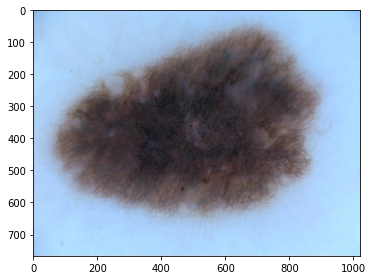

In [ ]:
skimage.io.imshow(image)

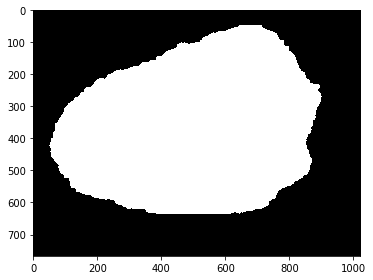

In [ ]:
image_mask=skimage.io.imread('/content/drive/My Drive/cancer dataset/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000000_Segmentation.png')
skimage.io.imshow(image_mask)

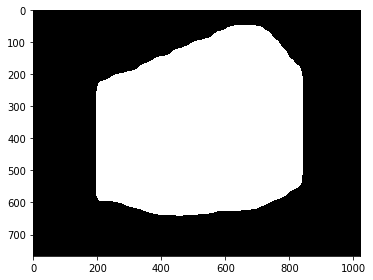

In [ ]:
skimage.io.imshow(r['masks'][:,:,0])

In [ ]:
mdataset_train.image_info[0]['source']

'skin-cancer'

In [ ]:
#! git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.77 MiB | 1.83 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Checking out files: 100% (76/76), done.
